# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from sklearn.linear_model import LinearRegression 
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

288

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"

# Build query URL
query_url = url + "appid=" + weather_api_key + "&units=imperial" + "&q="
query_url

'http://api.openweathermap.org/data/2.5/weather?appid=c55e1c9f1c3f28bab994931b713e9682&units=imperial&q='

In [4]:
city_two=[]
cloudiness=[]
country =[]
date =[]
humidity=[]
lat=[]
lon=[]
temp_max=[]
temp_min=[]
wind_speed=[]

x=0
y=1

for city in cities:
    try:
        response = requests.get(query_url + city.replace(" ","&")).json()
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        temp_max.append(response['main']['temp_max'])
        temp_min.append(response['main']['temp_min'])
        wind_speed.append(response['wind']['speed'])
        
        if x > 500:
            x=1
            y+=1
            city_two.append(city)
        else:
            x+=1
            city_two.append(city)
            print(f"Processing Record {x} of Set {y} | {city}")
    except:
        print("city not found")
        
print("------------------------------\nData Retrieval Complete\n------------------------------")
print(response)

Processing Record 1 of Set 1 | kavieng
Processing Record 2 of Set 1 | kodiak
city not found
Processing Record 3 of Set 1 | bredasdorp
city not found
Processing Record 4 of Set 1 | ojinaga
Processing Record 5 of Set 1 | butaritari
city not found
Processing Record 6 of Set 1 | mataura
Processing Record 7 of Set 1 | ushuaia
Processing Record 8 of Set 1 | port lincoln
Processing Record 9 of Set 1 | ribeira grande
Processing Record 10 of Set 1 | punta arenas
Processing Record 11 of Set 1 | rikitea
Processing Record 12 of Set 1 | roald
Processing Record 13 of Set 1 | victoria
Processing Record 14 of Set 1 | ekibastuz
Processing Record 15 of Set 1 | hobart
Processing Record 16 of Set 1 | fare
Processing Record 17 of Set 1 | tuatapere
Processing Record 18 of Set 1 | saint-philippe
Processing Record 19 of Set 1 | keti bandar
Processing Record 20 of Set 1 | bethel
Processing Record 21 of Set 1 | chokurdakh
Processing Record 22 of Set 1 | puerto ayora
Processing Record 23 of Set 1 | fortuna
Proce

Processing Record 190 of Set 1 | cape town
Processing Record 191 of Set 1 | mahebourg
Processing Record 192 of Set 1 | warmbad
Processing Record 193 of Set 1 | bambous virieux
Processing Record 194 of Set 1 | australind
Processing Record 195 of Set 1 | mahibadhoo
Processing Record 196 of Set 1 | bongandanga
city not found
Processing Record 197 of Set 1 | irshava
Processing Record 198 of Set 1 | biltine
Processing Record 199 of Set 1 | kirkcudbright
Processing Record 200 of Set 1 | mossendjo
Processing Record 201 of Set 1 | kaili
Processing Record 202 of Set 1 | grand centre
Processing Record 203 of Set 1 | vila franca do campo
city not found
Processing Record 204 of Set 1 | oudtshoorn
Processing Record 205 of Set 1 | faanui
Processing Record 206 of Set 1 | brunswick
Processing Record 207 of Set 1 | san patricio
Processing Record 208 of Set 1 | ucluelet
Processing Record 209 of Set 1 | trat
Processing Record 210 of Set 1 | senno
Processing Record 211 of Set 1 | tsumeb
Processing Record 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:

print(len(cities))
print(len(cloudiness))
print(len(country))
print(len(date))
print(len(humidity))
print(len(lat))
print(len(lon))
print(len(temp_max))
print(len(temp_min))
print(len(wind_speed))

282
248
248
248
248
248
248
248
248
248


In [6]:
city_df = pd.DataFrame({'cities':city_two,
                        'cloudiness':cloudiness,
                        'country':country,
                        'date':date,
                        'humidity':humidity,
                        'lat':lat,
                        'lon':lon,
                        'temp_max':temp_max,
                        'temp_min':temp_min,
                        'wind_speed':wind_speed})

city_df.to_csv(output_data_file,index=False)
city_df

,cities,cloudiness,country,date,humidity,lat,lon,temp_max,temp_min,wind_speed
0,ushuaia,40,AR,1577941103,45,-54.81,-68.31,62.60,62.60,8.05
1,jardim,39,BR,1577941103,92,-21.48,-56.15,71.74,71.74,0.38
2,hermanus,69,ZA,1577940566,86,-34.42,19.24,64.99,62.01,1.01
3,mount isa,40,GB,1577941103,81,53.66,-1.85,44.01,39.99,12.75
4,monmouth,90,GB,1577941104,87,51.81,-2.72,46.99,43.00,5.82
...,...,...,...,...,...,...,...,...,...,...
243,satipo,100,PE,1577941123,96,-11.26,-74.64,60.40,60.40,2.28
244,shitanjing,0,CN,1577940592,48,39.23,106.34,30.88,30.88,3.85
245,zhob,86,PK,1577941124,44,31.34,69.45,42.40,42.40,4.79
246,ambam,95,CM,1577941124,90,2.38,11.27,71.38,71.38,3.13


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

(-60, 80)

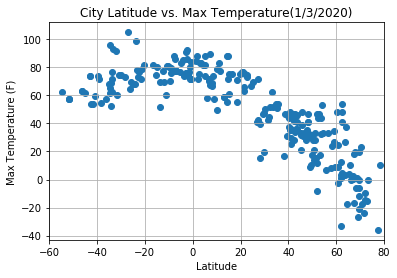

In [7]:
plt.scatter(city_df["lat"],city_df["temp_max"], marker="o")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("City Latitude vs. Max Temperature(1/3/2020)")
plt.xlim(-60,80)

#### Latitude vs. Humidity Plot

(-60, 80)

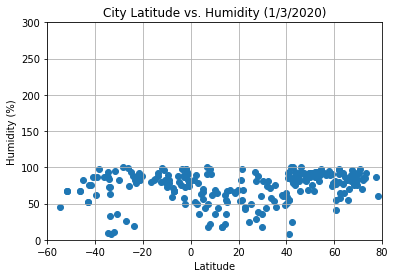

In [8]:
plt.scatter(city_df["lat"],city_df["humidity"], marker="o")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (1/3/2020)")
plt.ylim(0,300)
plt.xlim(-60,80)

#### Latitude vs. Cloudiness Plot

(-60, 80)

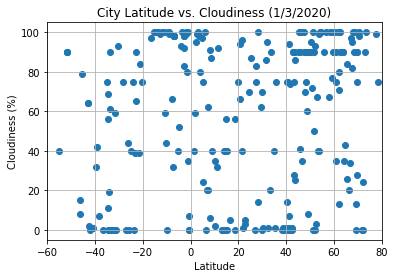

In [9]:
plt.scatter(city_df["lat"],city_df["cloudiness"], marker="o")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (1/3/2020)")
plt.ylim(-5,105)
plt.xlim(-60,80)

#### Latitude vs. Wind Speed Plot

(-60, 80)

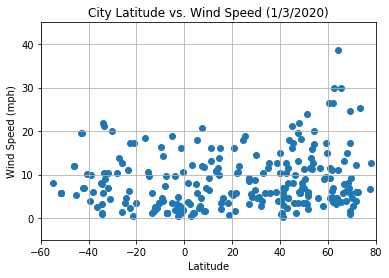

In [10]:
plt.scatter(city_df["lat"],city_df["wind_speed"], marker="o")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs. Wind Speed (1/3/2020)")
plt.ylim(-5,45)
plt.xlim(-60,80)

## Linear Regression

In [11]:
# OPTIONAL: Create a function to create Linear Regression plots


In [12]:
# Create Northern and Southern Hemisphere DataFrames


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [34]:
x_axis= np.array([(city_df["lat"]).mean()])
y_axis = np.array([(city_df["temp_max"])])

linreg=LinearRegression()
#x_axis=x_axis.reshape(-1,1)

linreg.fit(x_axis,y_axis)
y_pred = linreg.predict(x_axis)
plt.xlim(0,80)

plt.scatter(x_axis,y_axis)
plt.plot(x_axis, y_pred, color="red")
plt.show()

print(linreg.coef_)
print(linreg.intercept_)


ValueError: Expected 2D array, got 1D array instead:
array=[20.77782258].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

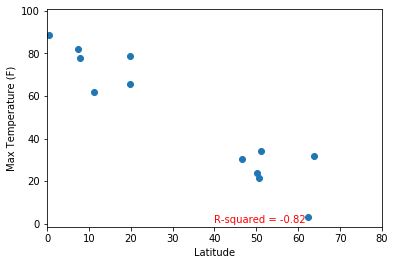

In [40]:
x= np.array



plt.scatter(city_df["lat"],city_df["temp_max"], marker="o")

plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.xlim(0,80)

linregress
r_squared = -0.8151657406810827
plt.text(40, 0.5, 'R-squared = %0.2f' % r_squared, color="red")
plt.show()

The r-squared is: -0.8151657406810827


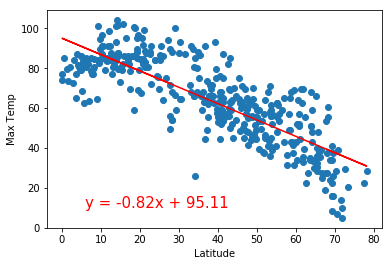

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

(-60, 0)

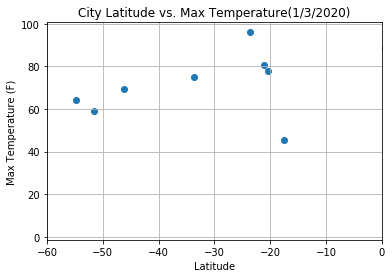

In [27]:
plt.scatter(city_df["lat"],city_df["temp_max"], marker="o")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.xlim(-60,0)

The r-squared is: 0.760263355051646


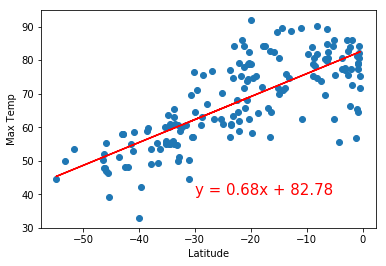

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

(0, 80)

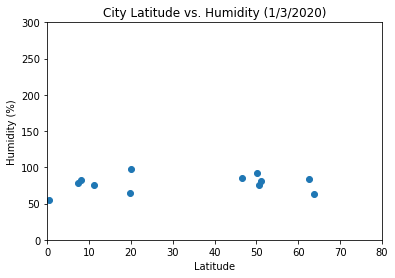

In [28]:
plt.scatter(city_df["lat"],city_df["humidity"], marker="o")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (1/3/2020)")
plt.ylim(0,300)
plt.xlim(0,80)

The r-squared is: 0.10358336015746494


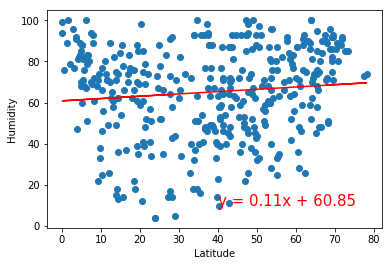

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

(-60, 0)

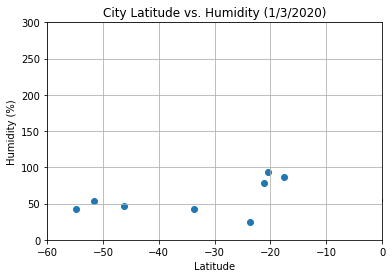

In [29]:
plt.scatter(city_df["lat"],city_df["humidity"], marker="o")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (1/3/2020)")
plt.ylim(0,300)
plt.xlim(-60,0)

The r-squared is: 0.14689473425583055


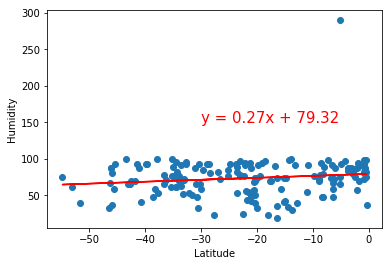

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

(0, 80)

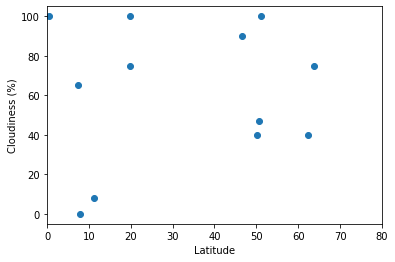

In [31]:
plt.scatter(city_df["lat"],city_df["cloudiness"], marker="o")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.ylim(-5,105)
plt.xlim(0,80)

The r-squared is: -0.08733547918934018


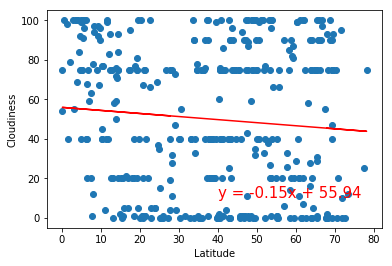

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

(-60, 0)

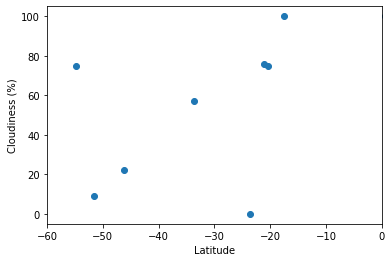

In [32]:
plt.scatter(city_df["lat"],city_df["cloudiness"], marker="o")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.ylim(-5,105)
plt.xlim(-60,0)

The r-squared is: 0.21881426893991618


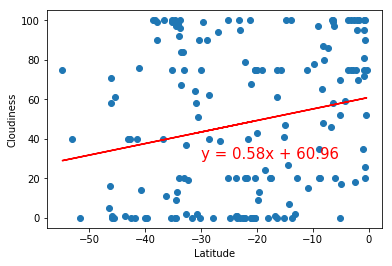

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

(0, 80)

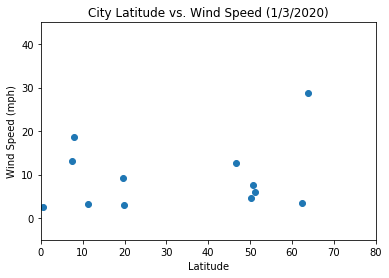

In [33]:
plt.scatter(city_df["lat"],city_df["wind_speed"], marker="o")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs. Wind Speed (1/3/2020)")
plt.ylim(-5,45)
plt.xlim(0,80)

The r-squared is: 0.1071382774388479


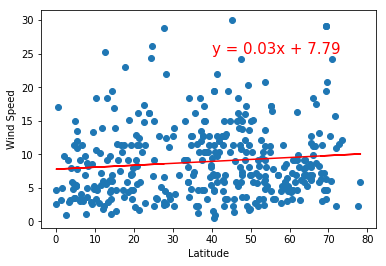

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

(-60, 0)

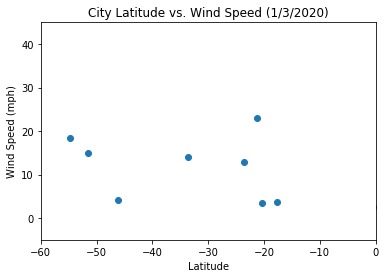

In [34]:
plt.scatter(city_df["lat"],city_df["wind_speed"], marker="o")

plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs. Wind Speed (1/3/2020)")
plt.ylim(-5,45)
plt.xlim(-60,0)

The r-squared is: -0.322483077139538


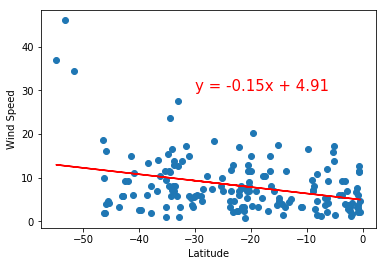